# 1. Import Library

In [29]:
import pandas as pd
pd.set_option('display.max_columns', None)

#import geopandas as gpd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import seaborn as sns
#from sklearnex import patch_sklearn
#patch_sklearn()

# 2. Load data

In [2]:
#replace x with the link to the csv
raw_data_df = pd.read_csv(r"N:\2108_KSRNR\WORKING\03_GIS\06_Spreadsheet\Stage 3\250312_DZ_HexGrid_ClusterTesting\CSV from GIS\DestinationCircles_HexGrid_Data_Test.csv",nrows = 1000) 
raw_data_df.head()

,GRID_ID,Grid_Source,slope_mean,flood_depth_mean,footprint_area,footprint_count,perm_mean,perm_major,Shape_Length,Shape_Area,footprint_pcnt,slope_mean_st,flood_depth_st,permeability_st
0,FL-204,Makman_Mushawer_Visitor_Hub_1HaHex,0.636624,0.0,0.0,0,2.0,2.0,372.241984,10000.002149,0.0,0.012116,0.0,0.25
1,FN-204,Makman_Mushawer_Visitor_Hub_1HaHex,0.878366,0.0,0.0,0,2.0,2.0,372.241884,9999.996776,0.0,0.016716,0.0,0.25
2,FO-204,Makman_Mushawer_Visitor_Hub_1HaHex,0.256772,0.0,0.0,0,2.0,2.0,372.241984,10000.002149,0.0,0.004887,0.0,0.25
3,FP-204,Makman_Mushawer_Visitor_Hub_1HaHex,0.362047,0.0,0.0,0,2.0,2.0,372.241984,10000.002149,0.0,0.006890,0.0,0.25
4,FQ-204,Makman_Mushawer_Visitor_Hub_1HaHex,0.326820,0.0,0.0,0,2.0,2.0,372.241884,9999.996776,0.0,0.006220,0.0,0.25


# 3. Prepare data for analysis

## 3.1 Select columns

In [3]:
#replace x with the ID column as you will need it later for rejoining the results with the data.
id_column = raw_data_df['GRID_ID'] 

# replace with list of field names that should be used for the k means analysis.Make sure all fields are numeric.
columns_to_select = ['footprint_pcnt','slope_mean_st','flood_depth_st','permeability_st'] 

#creates new dataframe with only the feilds for the k means analysis.

k_means_input_df = raw_data_df[columns_to_select] 

k_means_input_df.head()

,footprint_pcnt,slope_mean_st,flood_depth_st,permeability_st
0,0.0,0.012116,0.0,0.25
1,0.0,0.016716,0.0,0.25
2,0.0,0.004887,0.0,0.25
3,0.0,0.006890,0.0,0.25
4,0.0,0.006220,0.0,0.25


## 3.2 Scale data

## 3.2.1 Define scaling function

In [4]:
def scale_data(method='Standardisation', scale=True):
    if scale:
        if method == 'Standardisation':
            # Standardization (zero mean, unit variance)
            scaler = StandardScaler()
            scaled_data = scaler.fit_transform(k_means_input_df)

            # Convert back to DataFrame
            k_means_input_scaled_df = pd.DataFrame(scaled_data, columns=k_means_input_df.columns)
        
        elif method == 'Normalisation':
            # Normalization (scaling to range [0, 1])
            min_max_scaler = MinMaxScaler()
            normalized_data = min_max_scaler.fit_transform(k_means_input_df)

            # Convert back to DataFrame
            k_means_input_scaled_df = pd.DataFrame(normalized_data, columns=k_means_input_df.columns)
        
        else:
            raise ValueError("Invalid method. Choose either 'Standardisation' or 'Normalisation'.")
    
    else:
        k_means_input_scaled_df = k_means_input_df.copy()
        
    return k_means_input_scaled_df

## 3.2.2 Run scaling function

:param: 'scale' - set to True to scale and 'False' to not scale.

:param: 'method' take two possible arguments: 'Standardisation' or 'Normalisation'. Choose appropriate one.
- 'Standardisation' scales data between -1 and 1.
- 'Normalisation' scales data between 0 and 1. 

:returns: dataframe with scaled values

In [6]:
method='Standardisation' #Change as needed
scale=False #Change as needed

k_means_input_scaled_df = scale_data(method, scale)

# 4. K means analysis

## 4.1 Use elbow method to explore optimal clusters

C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

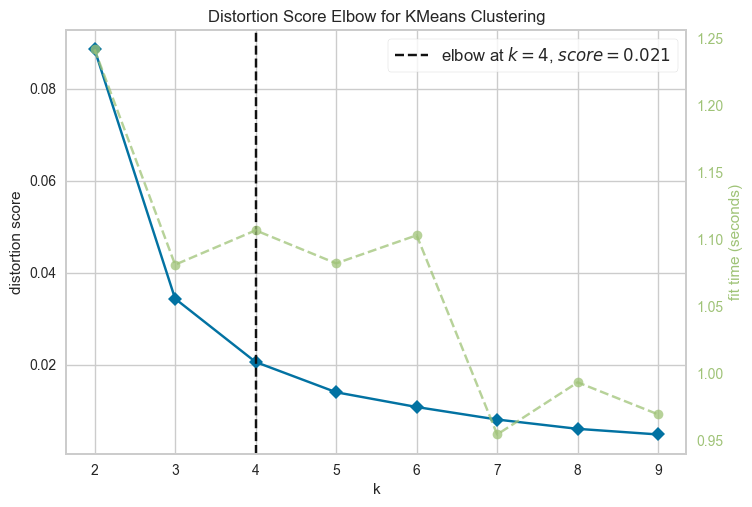

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)

#Set range of number of clusters to test: k = (lower number,higher number)
elbow_visualiser = KElbowVisualizer(km, k=(2,10))

# Fit the data 
elbow_visualiser.fit(k_means_input_scaled_df)        

# Show the figure
elbow_visualiser.show()                       

## 4.2 Use Silhouette method to explore optimal clusters

C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMe

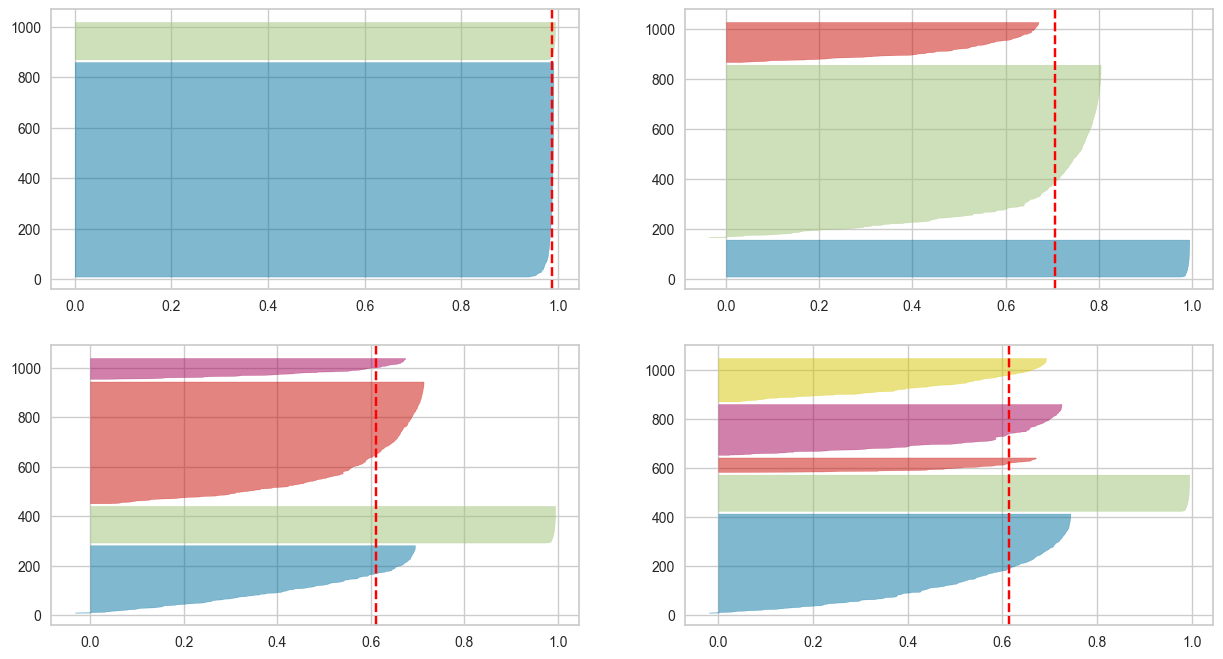

In [8]:
#set plot grid shape and size
fig, ax = plt.subplots(2, 2, figsize=(15,8))

#define range of cluster to test: [2,3,4,5....]
for i in [2, 3, 4, 5]:
    
    #Create KMeans instances for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    #Create SilhouetteVisualiser instance with KMeans instance
    #Fit the visualizer
    silhouette_visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    silhouette_visualizer.fit(k_means_input_scaled_df)

# 4.3 Train model for required number of clusters   

In [15]:
def run_kmeans(cluster_range):    
    
    min_clusters, max_clusters = cluster_range
    k_means_output_df = k_means_input_scaled_df.copy()
    for i in range(min_clusters, max_clusters + 1):
        # Initialize and fit the model
        k_means_clusters = KMeans(n_clusters=i, random_state=42)
        k_means_clusters.fit(k_means_input_scaled_df)

        # Predict clusters and add as new column
        k_means_output_df[f'kmeans_cluster_{i}'] = k_means_clusters.predict(k_means_input_scaled_df)

    return k_means_output_df

Runs K-Means clustering for a given range of clusters and updates the input DataFrame.
    
 - :param cluster_range: Tuple (min_clusters, max_clusters) defining the range of K values
 - :return: Updated DataFrame with cluster labels for each K value

In [16]:
# Define the cluster range (e.g., from 2 to 5 clusters)
cluster_range = (3, 5) #Change as needed

k_means_output_df = run_kmeans(cluster_range)
k_means_output_df.head()

C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

,footprint_pcnt,slope_mean_st,flood_depth_st,permeability_st,kmeans_cluster_3,kmeans_cluster_4,kmeans_cluster_5
0,0.0,0.012116,0.0,0.25,1,2,0
1,0.0,0.016716,0.0,0.25,1,0,0
2,0.0,0.004887,0.0,0.25,1,2,3
3,0.0,0.006890,0.0,0.25,1,2,3
4,0.0,0.006220,0.0,0.25,1,2,3


# 5. Explore results
Duplicate code and see results for 

,kmeans_cluster_3,footprint_pcnt,slope_mean_st,flood_depth_st,permeability_st,kmeans_cluster_4,kmeans_cluster_5
0,0,0.0,0.015081,0.0,1.00,1.000000,1.000000
1,1,0.0,0.011471,0.0,0.25,1.428986,1.350725
2,2,0.0,0.031850,0.0,0.25,1.583851,3.254658


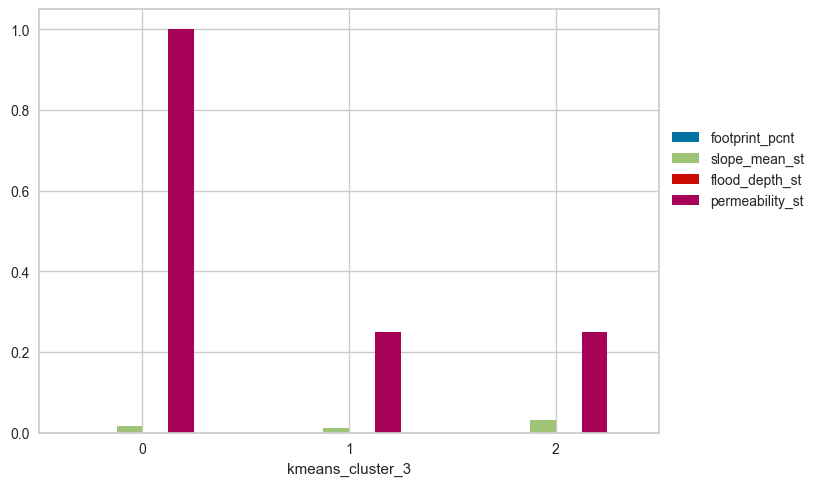

In [24]:
#Define list of k means columns. Update based on the number of clusters you have tested.

#3 Clusters
grouped_df_3 = k_means_output_df.groupby(['kmeans_cluster_3'], as_index=False).mean()    
ax = grouped_df_3.plot(x='kmeans_cluster_3', y=['footprint_pcnt','slope_mean_st','flood_depth_st','permeability_st'], kind="bar", rot=0)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
grouped_df_3.head()

,kmeans_cluster_4,footprint_pcnt,slope_mean_st,flood_depth_st,permeability_st,kmeans_cluster_3,kmeans_cluster_5
0,0,0.0,0.019666,0.0,0.25,1.278388,2.241758
1,1,0.0,0.015081,0.0,1.00,0.000000,1.000000
2,2,0.0,0.009032,0.0,0.25,1.000000,1.265720
3,3,0.0,0.037900,0.0,0.25,2.000000,2.588235


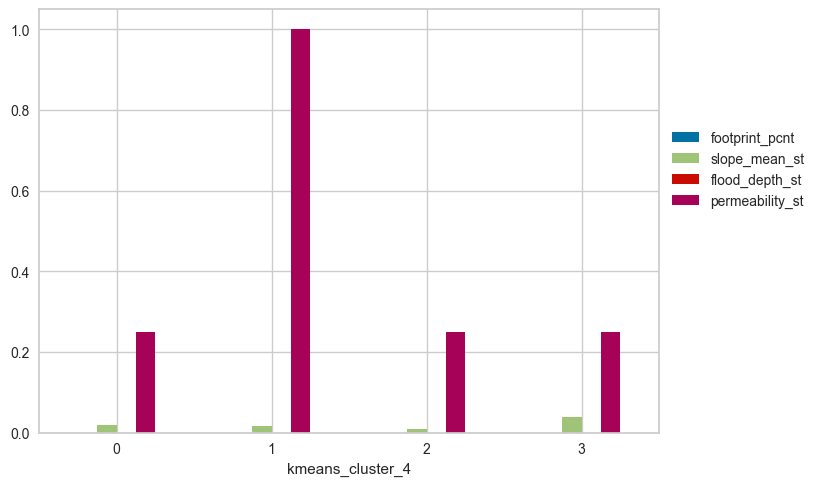

In [25]:
#Define list of k means columns. Update based on the number of clusters you have tested.

#4 Clusters
grouped_df_4 = k_means_output_df.groupby(['kmeans_cluster_3'], as_index=False).mean()    
ax = grouped_df_4.plot(x='kmeans_cluster_4', y=['footprint_pcnt','slope_mean_st','flood_depth_st','permeability_st'], kind="bar", rot=0)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
grouped_df_3.head()

,kmeans_cluster_5,footprint_pcnt,slope_mean_st,flood_depth_st,permeability_st,kmeans_cluster_3,kmeans_cluster_4
0,0,0.0,0.012986,0.0,0.25,1.000000,1.407407
1,1,0.0,0.015081,0.0,1.00,0.000000,1.000000
2,2,0.0,0.040957,0.0,0.25,2.000000,3.000000
3,3,0.0,0.005372,0.0,0.25,1.000000,2.000000
4,4,0.0,0.023645,0.0,0.25,1.567416,0.421348


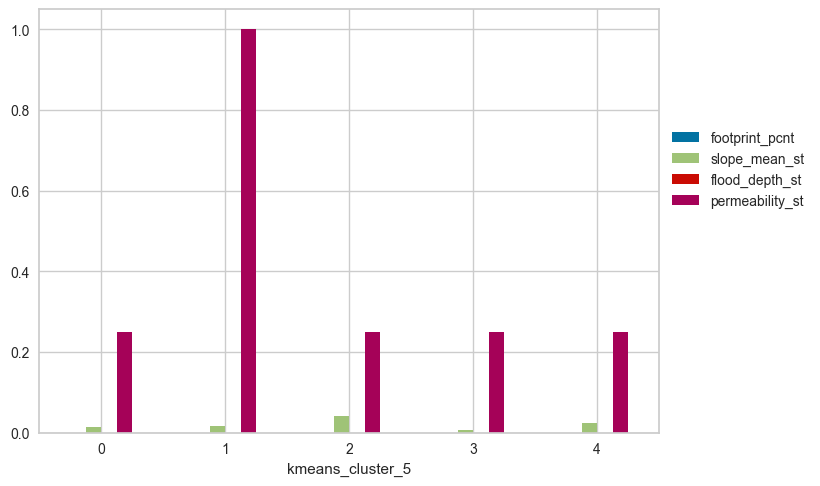

In [26]:
#Define list of k means columns. Update based on the number of clusters you have tested.

#5 Clusters
grouped_df_5 = k_means_output_df.groupby(['kmeans_cluster_5'], as_index=False).mean()    
ax = grouped_df_5.plot(x='kmeans_cluster_5', y=['footprint_pcnt','slope_mean_st','flood_depth_st','permeability_st'], kind="bar", rot=0)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
grouped_df_5.head()

# 6. Export data

In [27]:
# Concatenate the dropped columns back to the DataFrame
k_means_export_df = pd.concat([id_column, k_means_output_df], axis=1)

#replace x with the name and destination to save csv
k_means_export_df.to_csv(r"x")
k_means_export_df.head()

,GRID_ID,footprint_pcnt,slope_mean_st,flood_depth_st,permeability_st,kmeans_cluster_3,kmeans_cluster_4,kmeans_cluster_5
0,FL-204,0.0,0.012116,0.0,0.25,1,2,0
1,FN-204,0.0,0.016716,0.0,0.25,1,0,0
2,FO-204,0.0,0.004887,0.0,0.25,1,2,3
3,FP-204,0.0,0.006890,0.0,0.25,1,2,3
4,FQ-204,0.0,0.006220,0.0,0.25,1,2,3


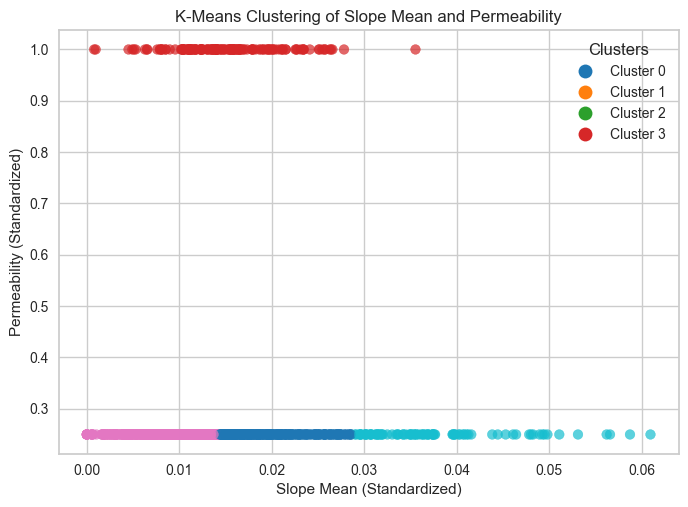

In [30]:


# Define the colormap
palette = sns.color_palette("tab10", n_colors=k_means_output_df['kmeans_cluster_4'].nunique())

# Create scatter plot
scatter = plt.scatter(
    k_means_output_df['slope_mean_st'], 
    k_means_output_df['permeability_st'], 
    c=k_means_output_df['kmeans_cluster_4'], 
    cmap='tab10', 
    alpha=0.7
)

# Create legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=10)
           for i in range(len(palette))]
labels = [f'Cluster {i}' for i in range(len(palette))]
plt.legend(handles, labels, title="Clusters", loc="best")

# Labels and title
plt.xlabel("Slope Mean (Standardized)")
plt.ylabel("Permeability (Standardized)")
plt.title("K-Means Clustering of Slope Mean and Permeability")

plt.show()